In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
dtype={"user_id": int, "username": object}

In [35]:
df = pd.read_csv("US_Fires_Over_One_Acre.csv")
df.head(5)

,Unnamed: 0,Unnamed: 0.1,FOD_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY
0,0,13,14,TIGER,2004,2453276.5,272,1200.0,4.0,Campfire,6.0,B,38.433333,-120.510000,CA,5
1,1,16,17,POWER,2004,2453284.5,280,1415.0,2.0,Equipment Use,16823.0,G,38.523333,-120.211667,CA,5
2,2,17,18,FREDS,2004,2453291.5,287,1618.0,2.0,Equipment Use,7700.0,G,38.780000,-120.260000,CA,17
3,3,24,25,EAGLE,2004,2453187.5,183,1712.0,1.0,Lightning,2.5,B,33.545278,-105.229444,NM,27
4,4,25,26,BACHELOR,2004,2453206.5,202,1405.0,1.0,Lightning,10.0,C,33.315833,-105.512222,NM,27


In [37]:
cause_df = df.groupby('STATE')["STAT_CAUSE_DESCR"].count()
cause_df

STATE
AL    44588
AR    21808
AZ    15342
CA    39563
CO     5034
CT      986
DC        7
DE       52
FL    48202
GA    74555
IA     2554
ID     9976
IL     1036
IN      639
KS     3525
KY    20343
LA    20304
MA      284
MD      987
ME     2450
MI     4504
MN    16256
MO    12242
MS    55729
MT     9914
NC    35088
ND     6203
NE     3838
NH      682
NJ     3104
NM    12313
NV     5019
NY    17242
OH     1454
OK    32655
OR     8997
PA     3137
RI      105
SC    43719
SD    10470
TN    18277
TX    73300
UT     7053
VA     8778
VT      160
WA     7106
WI     6598
WV    10027
WY     4771
Name: STAT_CAUSE_DESCR, dtype: int64

In [21]:
sumofstates = df.groupby('STATE')
numfires = sumofstates['STATE'].count()
print(numfires)

STATE
AL    44588
AR    21808
AZ    15342
CA    39563
CO     5034
CT      986
DC        7
DE       52
FL    48202
GA    74555
IA     2554
ID     9976
IL     1036
IN      639
KS     3525
KY    20343
LA    20304
MA      284
MD      987
ME     2450
MI     4504
MN    16256
MO    12242
MS    55729
MT     9914
NC    35088
ND     6203
NE     3838
NH      682
NJ     3104
NM    12313
NV     5019
NY    17242
OH     1454
OK    32655
OR     8997
PA     3137
RI      105
SC    43719
SD    10470
TN    18277
TX    73300
UT     7053
VA     8778
VT      160
WA     7106
WI     6598
WV    10027
WY     4771
Name: STATE, dtype: int64


In [25]:
test = numfires.to_frame()
test = test.rename(columns={"STATE": "COUNT"})
test 

,COUNT
STATE,
AL,44588
AR,21808
AZ,15342
CA,39563
CO,5034
CT,986
DC,7
DE,52
FL,48202


In [54]:
test = test.sort_values(by='COUNT', ascending=False)
test.head()

,COUNT
STATE,
GA,74555
TX,73300
MS,55729
FL,48202
AL,44588


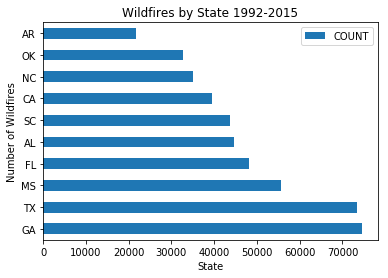

In [59]:
top10.plot.barh()
y_pos = np.arange(len('STATE'))
plt.title("Wildfires by State 1992-2015")
plt.xlabel("State")
plt.ylabel("Number of Wildfires")
plt.show()

([<matplotlib.patches.Wedge at 0x1fa45c895f8>,
 [Text(0.7013021524813872, 0.8474522351879034, 'Debris Burning'),
  Text(-0.8233203983429526, 0.7294816801485847, 'Arson'),
  Text(-1.0179257364667762, -0.4169258867455601, 'Miscellaneous'),
  Text(-0.4220739773589725, -1.0158019283484245, 'Lightning'),
  Text(0.2086007942310232, -1.0800396791998832, 'Missing/Undefined'),
  Text(0.6957218481744138, -0.852039382876624, 'Equipment Use'),
  Text(0.9302994282580314, -0.586977830742167, 'Campfire'),
  Text(1.0073336695012165, -0.44190369798092227, 'Smoking'),
  Text(1.0575631456933747, -0.30258914863414044, 'Children'),
  Text(1.0883820218368427, -0.15945085306246143, 'Railroad'),
  Text(1.0983711138497334, -0.059840590408986434, 'Powerline'),
  Text(1.099815987585937, -0.020119479376223413, 'Fireworks'),
  Text(1.0999932023107932, -0.003867152705346425, 'Structure')])

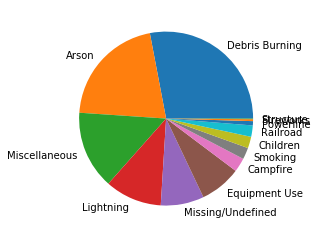

In [50]:
causes = df.groupby(df["STAT_CAUSE_DESCR"])
causes_df = pd.DataFrame(causes["FOD_ID"].count())
causes_df

common_cause = causes_df.sort_values("FOD_ID", ascending=False)
common_cause
numbers = common_cause["FOD_ID"]
labels = common_cause.index 
plt.pie(numbers, labels=labels)